In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flux.shape import CgalTrimeshShapeModel, get_surface_normals

import pyvista as pv

# (Post-Spinup) Temperature Computation

One the thermal model is (partially) spun up, temperature can be comptued from a more realistic starting point. Compare the tempearture fields computing after starting with a spun up model.

In [ ]:
mesh_dir = 'python-flux/examples/shackleton_vary_outer/'
mesh_name = 'shackleton'

In [2]:
V = np.load(f'{mesh_dir}/{mesh_name}_verts_2.5_80.npy')
F = np.load(f'{mesh_dir}/{mesh_name}_faces_2.5_80.npy')

# convert verts from km to m
V *= 1e3

N = get_surface_normals(V, F)
N[N[:, 2] > 0] *= -1

faces_padded = np.concatenate([3*np.ones(F.shape[0],dtype=int).reshape(-1,1), F], axis=1)

shape_model = CgalTrimeshShapeModel(V, F, N)
F.shape

(13288, 3)

Load the temperature profiles for the triangular mesh over the course of one cycle using the uncompressed form factor matrix.

In [3]:
max_area, outer_radius = 2.5, 80
svd_tol = 1e-1

basedir = f"{mesh_dir}/results"    

In [4]:
true_T_frames = []
for i in np.arange(0,2880,20):
    true_T_frames.append(np.load(basedir+"/true_{}_{}/T_frames_post_spinup/T{:03d}.npy".format(max_area, outer_radius, i)))
true_T_frames = np.array(true_T_frames)
true_T_frames.shape

In [7]:
step = 10
layer = 0

grid = pv.PolyData(V, faces=faces_padded.flatten(), n_faces=F.shape[0])

grid['Surface Temperature (K)'] = np.empty(F.shape[0])
grid['Surface Temperature (K)'][...] = true_T_frames[step,:,layer]
grid.plot()

Widget(value="<iframe src='http://localhost:53124/index.html?ui=P_0x1ca9a3c34c0_1&reconnect=auto' style='width…

Load the temperature profiles for the triangular mesh over the course of one cycle using a compressed form factor matrix.

In [8]:
svd_T_frames = []
for i in np.arange(0,2880,20):
    svd_T_frames.append(np.load(basedir+"/svd_{}_{}_{:.0e}_{}k0/T_frames_post_spinup/T{:03d}.npy".format(max_area, outer_radius, svd_tol, 40, i)))
svd_T_frames = np.array(svd_T_frames)

For each triangle in the mesh and at every point in time, compute and plot the absolute and relative difference in temperature between the compressed and uncompressed versions.

In [9]:
T_frames_diff_field = abs(true_T_frames - svd_T_frames)
T_frames_diff_field.shape

(144, 13288, 61)

In [10]:
step = 10
layer = 0

grid = pv.PolyData(V, faces=faces_padded.flatten(), n_faces=F.shape[0])

grid['Temperature Approximation Error (K)'] = np.empty(F.shape[0])
grid['Temperature Approximation Error (K)'][...] = T_frames_diff_field[step,:,layer]
grid.plot()

Widget(value="<iframe src='http://localhost:53124/index.html?ui=P_0x1ca9c12e2f0_2&reconnect=auto' style='width…

In [10]:
T_frames_rel_diff_field = abs(true_T_frames - svd_T_frames) / true_T_frames
T_frames_rel_diff_field.shape

(144, 13288, 61)

In [11]:
step = 10
layer = 0

grid = pv.PolyData(V, faces=faces_padded.flatten(), n_faces=F.shape[0])

grid['Temp Relative Difference'] = np.empty(F.shape[0])
grid['Temp Relative Difference'][...] = T_frames_rel_diff_field[step,:,layer]
grid.plot()

Widget(value="<iframe src='http://localhost:59465/index.html?ui=P_0x1c2100134f0_2&reconnect=auto' style='width…

Plot the errors as a function of the "true" or reference temperature as computed using the uncompressed matrix.

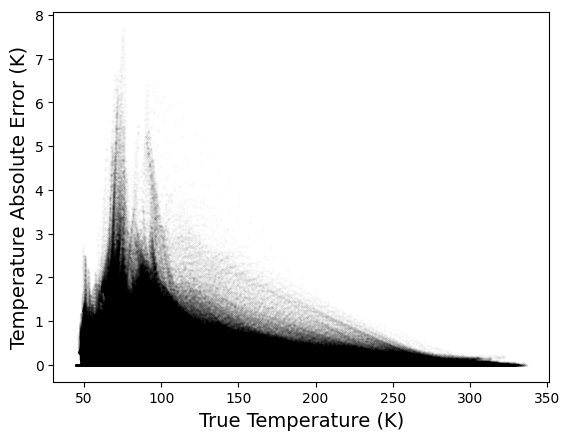

In [13]:
plt.scatter(true_T_frames.flatten(), T_frames_diff_field.flatten(), s=.1, alpha=0.05, c='k')
plt.xlabel("True Temperature (K)", fontsize=14)
plt.ylabel("Temperature Absolute Error (K)", fontsize=14)
plt.show()

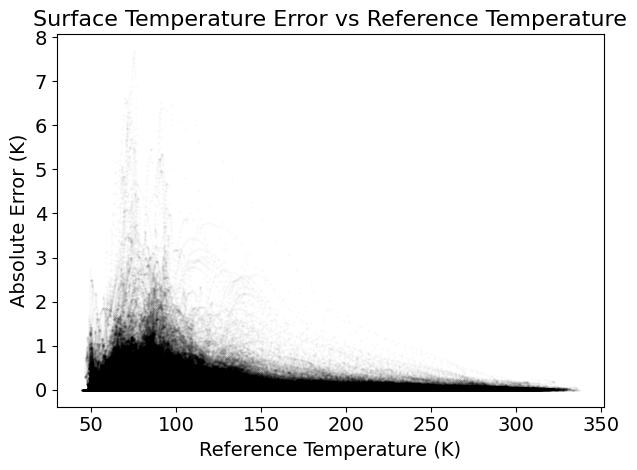

In [9]:
plt.scatter(true_T_frames[:,:,0].flatten(), T_frames_diff_field[:,:,0].flatten(), s=.1, alpha=0.05, c='k')
plt.xlabel("Reference Temperature (K)", fontsize=14)
plt.ylabel("Absolute Error (K)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Surface Temperature Error vs Reference Temperature", fontsize=16)
plt.tight_layout()
plt.savefig("surface_temperature_abs_error_vs_true.png")
plt.show()